In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Օժանդակ խնդիր` func1

https://blogger.googleusercontent.com/img/a/AVvXsEiPFFKo3Tw7uHpeC4kcYYRNaq9dSmtQFrt8V9th0yctZXDJUtPP1Fl9G_I6IG40xvquPb0EvzBBV_AejyYieaUzF-zJeE66boW1WBfkt1dWD33ejJ4V3C-FJt2SiNIw3TD_FmEwDuhZYqYvseKVc44wxvbvDprJmsmEEpVpCnSeRzZ8PmzZDPQ2Gm1G1NmD

https://blogger.googleusercontent.com/img/a/AVvXsEivQzj9V8msNYcq04qDdTgBDqcnVBm7gAi7yPcrtmvYBLwPuiH97YofdBMVVUu8dHVxhfEGrYxX3G88oPN3Tu0tlU0OxV0c1OJlyOie6kwdmE8GxvMbjIZHQwaEnMJJEXVQLGJIxXZrhWWTMrh1Gi-MvFF1W84j-7BqSz3aUtKzX555FFt7LwUBn82UBDbc

In [ ]:
def func1(M_bool, M, a, b, verbose=False):   # M-(m, n) matrix, a-array with length m, b-array with length n
    if verbose:
        sns.heatmap(M, annot=True, square=True, annot_kws={"size": 30}, mask=M_bool==0, cmap='Blues', cbar=False )
        plt.show()
    m, n = M.shape
    n_toxer, n_syuner = [0]*m, [0]*n  # նշված տողեր, նշված սյուներ
    d_toxer, d_syuner = [0]*m, [0]*n  # դիտարկված տողեր, դիտարկված սյուներ

    # նշենք այն M[i] տողերը, որոնց համար M[i].sum() < a[i]
    for i in range(m):
        if M[i].sum() < a[i]:
            n_toxer[i] = (-1, a[i]-M[i].sum())
    if verbose:
        print('n_toxer: ', n_toxer)

    s = True
    while s:
        # նշված, չդիտարկված տողերի դիտարկում
        for i in range(m):
            if n_toxer[i] != 0 and d_toxer[i] == 0:
                for j in range(n):
                    if M_bool[i][j] and n_syuner[j] == 0:
                        n_syuner[j] = (i, n_toxer[i][1])
                        if M[:, j].sum() < b[j]:  # B Փուլ
                            arr = [j]
                            syun = j
                            while arr[-1] != -1:
                                tox = n_syuner[syun][0]
                                arr.append(tox)
                                syun = n_toxer[tox][0]
                                arr.append(syun)
                            arr = arr[:-1]
                            if verbose:
                                print('j(0), i(1), j(1), ..., j(h-1), i(h) ->', arr)
                            add = min([n_syuner[j][1], b[j]-M[:, j].sum()])
                            for k in range(0, len(arr), 2):
                                M[arr[k+1], arr[k]] += add
                            for k in range(1, len(arr)-2, 2):
                                M[arr[k], arr[k+1]] -= add

                            return func1(M_bool, M, a, b, verbose=verbose)
                d_toxer[i] = 1
        if verbose:
            print('d_toxer: ', d_toxer)
            print('n_syuner: ', n_syuner)

        # նշված, չդիտարկված սյուների դիտարկում
        for j in range(n):
            if n_syuner[j] != 0 and d_syuner[j] == 0:
                for i in range(m):
                    if M[i][j] > 0 and n_toxer[i] == 0:
                        n_toxer[i] = (j, min(M[i][j], n_syuner[j][1]))
                d_syuner[j] = 1
        if verbose:
            print("d_syuner: ", d_syuner)
            print('n_toxer: ', n_toxer)

        s = False
        for i in range(m):
            if (n_toxer[i] != 0 and d_toxer[i] == 0):
                s = True

    return M

## Նեղ տեղերի խնդիր` func2

https://blogger.googleusercontent.com/img/a/AVvXsEhrQ9HfLSoV2NUW3UBsUaNcz6MBxA6IIzfdInPgL5nZuSbadcsCmzc3HcSPsgwnQUiQDEIqhWKwh5ZyHV7vgk9A7_NvML8HoQy0AG9J1tGcrdS310kIqC1-PimXZFiqv0wbPEQMB6z0H7Ob_QJd1CaxLGwuvsz1KJa4bKUMsPTGNWmdF2s1j2toXx7r14CN

https://blogger.googleusercontent.com/img/a/AVvXsEhWhT49mDHxQPOnXya4Ao-ugS7Jm7OLIhNsr0DfsX1FR_c2qFOfbHGsxnqgqWzRjVx21LlQtJX5H5g0rxvP_SLFKDbkzym45Bl9bBqXGydnMs6OhbM-e3tQs8sN_Sp1ptHhgXJmzZRyZHOAfQ2JFTl2BCKxkk2T90QBvD1Z3a2wcxTKFRmisGN4b7ZMmU1e

In [ ]:
def func2(M, verbose=False):
    n = M.shape[0]
    b0 = min(M.max(axis=0).min(), M.max(axis=1).min())
    opt = b0
    # 1-ին քայլ՝ կազմում ենք  M մատրիցի  β0-ին չգերազանցող բոլոր տարրերի կարգավորված
    # հաջորդականությունը՝  β0 > β1 > β2 >… և  k պարամետրին վերագրում 0 արժեք։
    B = M.flatten()
    B = -np.sort(-np.array([i for i in set(B) if i <= opt]))
    if verbose:
        print('B = ', B)
    k = 0

    while True:  # 2-րդ քայլ
        I = np.zeros(n)
        J = np.zeros(n)
        M_bool = (M >= B[k])
        M_new = np.zeros_like(M)
        for i in range(n):
            for j in range(n):
                if M_bool[i][j] and I[i] == 0 and J[j] == 0:
                    M_new[i][j] = 1
                    I[i] = 1
                    J[j] = 1
        if verbose:
            print('\nk = ', k, ' B[k] = ', B[k])
        M_result = func1(M_bool, M_new, np.ones(n), np.ones(n), verbose=verbose)
        if M_result.sum() == n: # Եթե դասավորված 1-երի քանակը  n է, ալգորիթմն ավարտում է աշխատանքը
            opt = B[k]
            break
        # հակառակ դեպքում  k-ի արժեքին ավելացվում է 1 և նորից կատարվում է 2-րդ քայլը
        k += 1
    return opt, M_bool, M_result

##   Examples

Optimal value is:  5


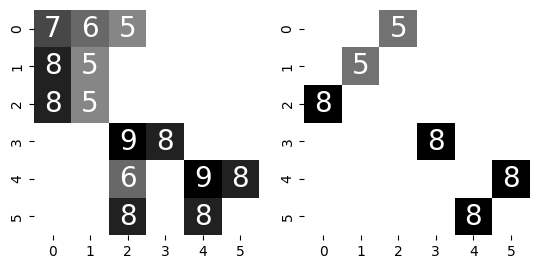

[(0, 2), (1, 1), (2, 0), (3, 3), (4, 5), (5, 4)]

In [ ]:
M = np.array([[7, 6, 5, 3, 2, 2],
              [8, 5, 4, 2, 3, 3],
              [8, 5, 2, 3, 3, 3],
              [2, 3, 9, 8, 4, 2],
              [3, 1, 6, 4, 9, 8],
              [2, 2, 8, 4, 8, 3]])

opt, M_bool, M_result = func2(M, False)

print('Optimal value is: ', opt)
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.heatmap(M, annot=True, annot_kws={"size": 20}, mask=M_bool==0, vmin=0, cbar=False, cmap='Greys', ax=ax1, square=True)
sns.heatmap(M, annot=True, annot_kws={"size": 20}, mask=M_result==0, vmin=0, cbar=False, cmap='Greys', ax=ax2, square=True)
plt.show()

[cell for cell in zip(np.where(M_result==1)[0], np.where(M_result==1)[1])]

<div>
    <img src='https://blogger.googleusercontent.com/img/a/AVvXsEiPFFKo3Tw7uHpeC4kcYYRNaq9dSmtQFrt8V9th0yctZXDJUtPP1Fl9G_I6IG40xvquPb0EvzBBV_AejyYieaUzF-zJeE66boW1WBfkt1dWD33ejJ4V3C-FJt2SiNIw3TD_FmEwDuhZYqYvseKVc44wxvbvDprJmsmEEpVpCnSeRzZ8PmzZDPQ2Gm1G1NmD', width=450>
<div>

<div>
    <img src='https://blogger.googleusercontent.com/img/a/AVvXsEivQzj9V8msNYcq04qDdTgBDqcnVBm7gAi7yPcrtmvYBLwPuiH97YofdBMVVUu8dHVxhfEGrYxX3G88oPN3Tu0tlU0OxV0c1OJlyOie6kwdmE8GxvMbjIZHQwaEnMJJEXVQLGJIxXZrhWWTMrh1Gi-MvFF1W84j-7BqSz3aUtKzX555FFt7LwUBn82UBDbc', width=450>
<div>

<div>
    <img src='https://blogger.googleusercontent.com/img/a/AVvXsEhrQ9HfLSoV2NUW3UBsUaNcz6MBxA6IIzfdInPgL5nZuSbadcsCmzc3HcSPsgwnQUiQDEIqhWKwh5ZyHV7vgk9A7_NvML8HoQy0AG9J1tGcrdS310kIqC1-PimXZFiqv0wbPEQMB6z0H7Ob_QJd1CaxLGwuvsz1KJa4bKUMsPTGNWmdF2s1j2toXx7r14CN', width=450>
<div>

<div>
    <img src='https://blogger.googleusercontent.com/img/a/AVvXsEhWhT49mDHxQPOnXya4Ao-ugS7Jm7OLIhNsr0DfsX1FR_c2qFOfbHGsxnqgqWzRjVx21LlQtJX5H5g0rxvP_SLFKDbkzym45Bl9bBqXGydnMs6OhbM-e3tQs8sN_Sp1ptHhgXJmzZRyZHOAfQ2JFTl2BCKxkk2T90QBvD1Z3a2wcxTKFRmisGN4b7ZMmU1e', width=450>
<div>